This Notebook shows five methods to reduce dimensionality. For a deeper dive look at [this notebook](https://www.kaggle.com/frankmollard/a-story-about-unsupervised-learning).

In [1]:
import sys

In [47]:
!{sys.executable} -m pip install  #tensorflow pydot pygwalker umap-learn trimap pacmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 17.5 MB/s eta 0:00:00
  Using cached wrapt-1.14.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (77 kB)
  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached werkzeug-3.0.1-py3-none-any.whl.metadata (4.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 7.8 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 7.9 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.7 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━

In [4]:
import os
from time import time
import psutil
import numpy as np 
import pandas as pd 

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap
import trimap
import pacmap

import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
seed=123
np.random.seed(seed)

In [9]:
import pygwalker as pyg

In [35]:
df = pd.read_csv("../../data/covtype.data")

In [52]:
list(range(1,5))

[1, 2, 3, 4]

In [53]:
sum(df[col]*n for col, n in zip(df.filter(like='Area'), range(1,5)))
    

0         1
1         1
2         1
3         1
4         1
         ..
581006    3
581007    3
581008    3
581009    3
581010    3
Length: 581011, dtype: int64

In [ ]:
df['Area'] = df['Area1'] * 1 + df['Area2'] * 2


In [36]:
df.columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']

In [37]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2590      56      2                               212   
1       2804     139      9                               268   
2       2785     155     18                               242   
3       2595      45      2                               153   
4       2579     132      6                               300   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              -6                              390   
1                              65                             3180   
2                             118                             3090   
3                              -1                              391   
4                             -15                               67   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            220             235            151   
1            234             238            135   
2            238             238            122   
3            220             234            150   
4            230             237            140   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6225  ...            0            0   
1                                6121  ...            0            0   
2                                6211  ...            0            0   
3                                6172  ...            0            0   
4                                6031  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           2  
2            0            0           2  
3            0            0           5  
4            0            0           2  

[5 rows x 55 columns]

In [57]:
df['Wilderness_Area'] = sum(df[col]*n for col, n in zip(df.filter(like='Wilderness'), range(1,5)))
df['Soil_Type'] = sum(df[col]*n for col, n in zip(df.filter(like='Soil_Type'), range(1,41)))

In [56]:
pyg.walk(df.sample(frac=0.1))

Box(children=(HTML(value='<div id="ifr-pyg-00060f00561d49f6MZmQ7i2sSarRDxN9" style="height: auto">\n    <head>…

In [58]:
Data = df.drop(columns=[c for c in df.columns if "Soil" in c or "Area" in c])

In [22]:
def Normalization(DF, cols):
    DF=DF.copy()
    for c in cols:
        DF[f"{c}"] = ((DF["{}".format(c)]-DF["{0}".format(c)].mean()) / DF["{}".format(c)].std())
        
    return DF

In [44]:
Data = Normalization(DF=Data, cols=Data.drop(columns=["Cover_Type"]).columns)
Data=Data.sample(frac=0.1, random_state=seed)

In [30]:
import seaborn as sns

In [27]:
methods={
    "PCA": PCA(2),
    "tSNE": TSNE(n_components=2, perplexity=25),
    "UMAP": umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.75),
    "TriMap": trimap.TRIMAP(verbose=False, n_inliers=5, n_outliers=7, n_random=12),
    "PaCMAP": pacmap.PaCMAP(n_components=2, n_neighbors=7)
}

In [28]:
def viz(df, mdls, rows=5, cols=1):

    fig, p = plt.subplots(nrows=rows, ncols=cols, figsize=(30,20*rows))

    c=0
    r=0
    k=0

    for c in range(cols):
        for r in range(int(rows/cols)):
            start = time()
            print(list(mdls.values())[k], "Transforming...")
            transformed=list(mdls.values())[k].fit_transform(df[df.columns[1:]].values)
            end = time()
            print(
                list(mdls.values())[k],
                "Transformed in",
                str(round(end - start)),
                "seconds.",
                "RAM usage:",
                str(psutil.virtual_memory()[2]) + "%"
            )
            Reduced = pd.DataFrame(transformed)
            if cols != 1:
                scatter = p[r, c].scatter(
                    x=Reduced[0],
                    y=Reduced[1],
                    c=df["Cover_Type"],
                    cmap="tab10",
                    alpha=0.9
                    )
                p[r, c].set_title(list(mdls.keys())[k], fontsize=20)
                lgnd = p[r, c].legend(
                    *scatter.legend_elements(),
                    loc="upper left", 
                    title="Cover_Type",
                    title_fontsize=18,
                    fontsize=18
                )
                p[r, c].add_artist(lgnd)
                p[r, c].grid(False)

            else:
                scatter = p[r].scatter(
                    x=Reduced[0],
                    y=Reduced[1],
                    c=df["Cover_Type"],
                    cmap="tab10",
                    alpha=0.9
                    )
                p[r].set_title(list(mdls.keys())[k], fontsize=20)
                lgnd = p[r].legend(
                    *scatter.legend_elements(),
                    loc="upper left", 
                    title="Cover_Type",
                    title_fontsize=18,
                    fontsize=18
                )
                p[r].add_artist(lgnd)
                p[r].grid(False)

            k+=1

    plt.show()

PCA(n_components=2) Transforming...
PCA(n_components=2) Transformed in 0 seconds. RAM usage: 66.6%
TSNE(perplexity=25) Transforming...
TSNE(perplexity=25) Transformed in 263 seconds. RAM usage: 67.8%
UMAP(min_dist=0.75, n_neighbors=10) Transforming...
UMAP(min_dist=0.75, n_neighbors=10, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}) Transformed in 36 seconds. RAM usage: 68.3%
TRIMAP(n_inliers=5, n_outliers=7, n_random=12) Transforming...
TRIMAP(n_inliers=5, n_outliers=7, n_random=12,
       triplets=array([[    0,  5374, 14570],
       [    0,  5374, 11965],
       [    0,  5374,  1320],
       ...,
       [58100,  9105, 15784],
       [58100, 13037, 40116],
       [58100, 47208, 23924]], dtype=int32),
       weights=array([11.96583   , 13.294334  ,  8.440247  , ...,  1.1382332 ,
        0.24579883,  2.7868772 ], dtype=float32)) Transformed in 35 seconds. RAM usage: 69.1%
PaCMAP(n_neighbors=7, 

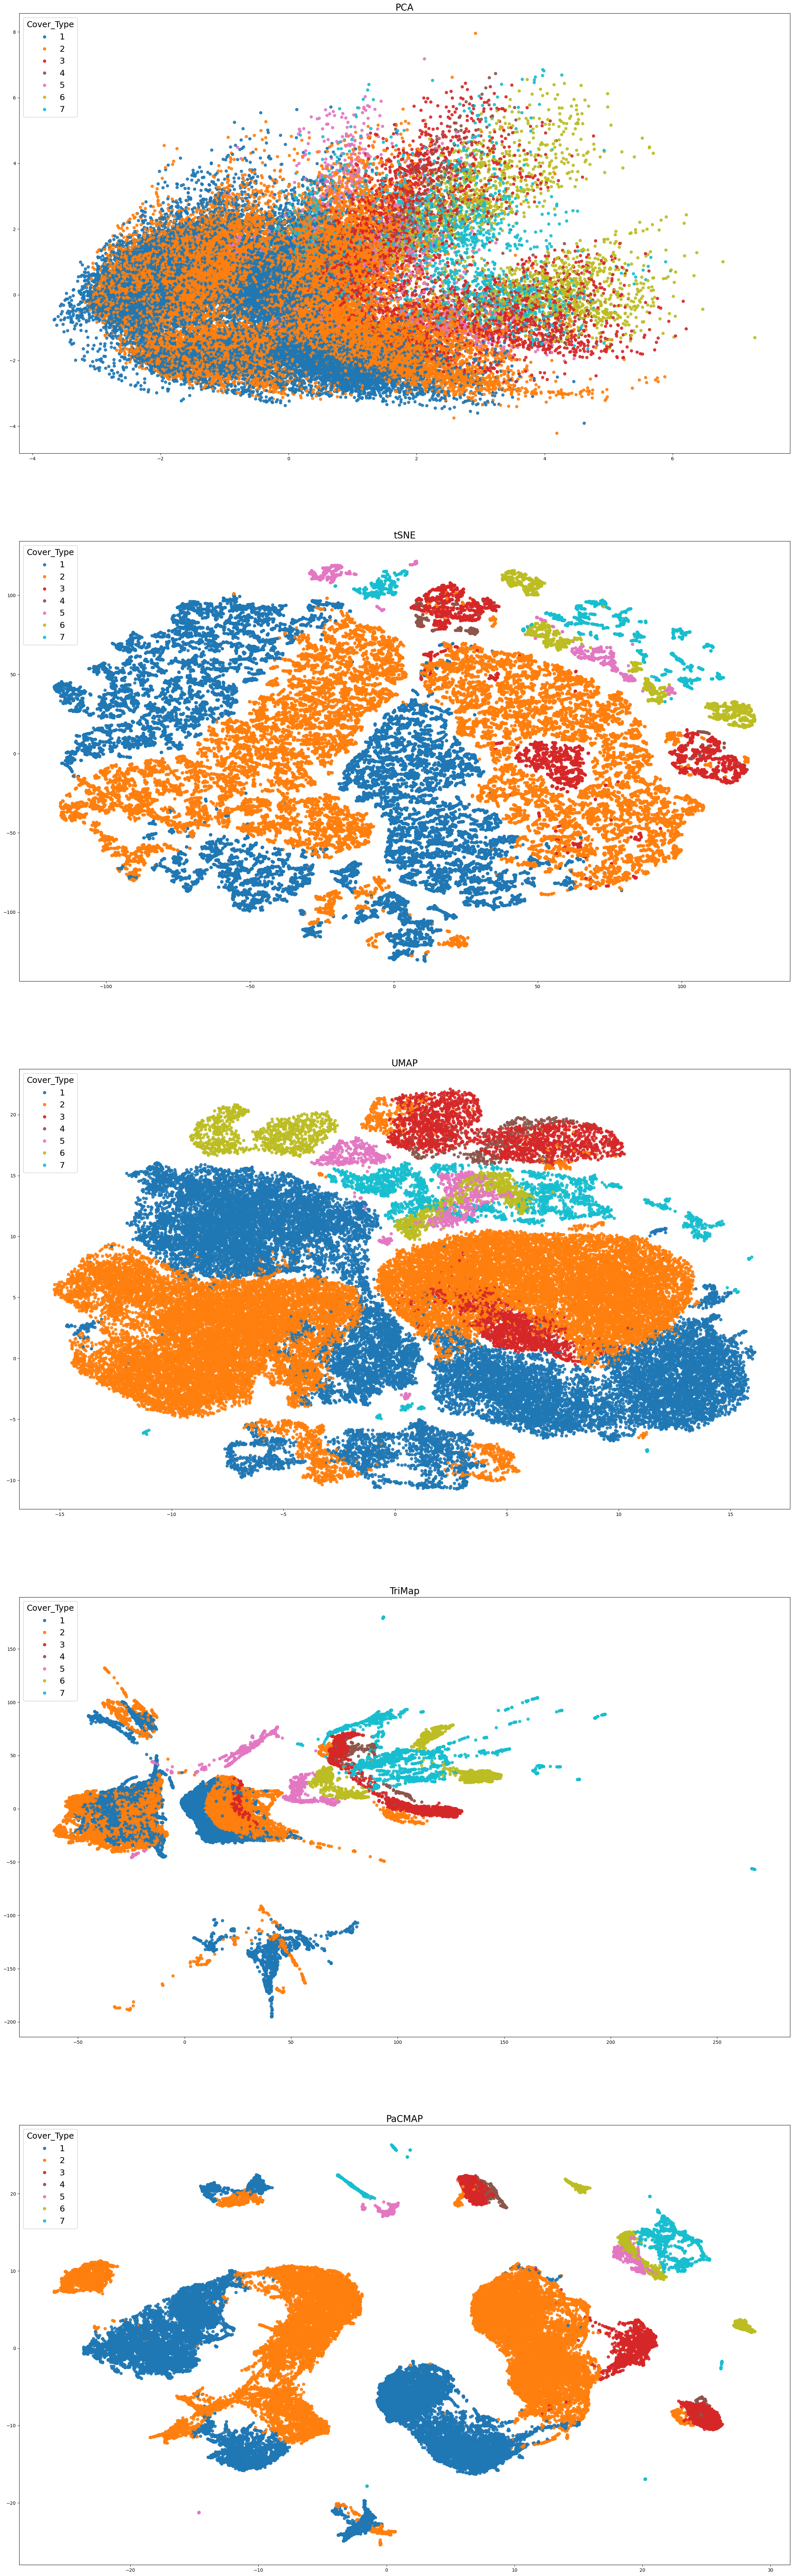

In [45]:
viz(Data, methods)